In [70]:
import pandas as pd
from fbprophet import Prophet

Data Eurostat:
1. early leavers level of urbanisation
2. early leavers citizen (born in the EU, no European citizenship)
3. early leavers foreign country (born abroad, no European citizenship
4. early leavers labour status

predictor: % early leavers Europe

Concept:
prediction for

1. total
2. male
3. female

Data cleaning:
drop columns with > 40% missing/ incomplete data
drop rows with > 2 completley missing or incomplete data
countries: Estonia, Lithuania, Luxembourg, Malta, Slovakia, Iceland, Montenegro, Turkey

In [9]:
pred_total = pd.read_excel(r'C:\Users\dgruh\ironhack\assignments\week9\proyecto final\datasets\dataset_pred_total_clean.xls', skiprows = 1)
pred_males = pred_total = pd.read_excel(r'C:\Users\dgruh\ironhack\assignments\week9\proyecto final\datasets\dataset_pred_Males_clean.xls', skiprows = 1)
pred_total = pd.read_excel(r'C:\Users\dgruh\ironhack\assignments\week9\proyecto final\datasets\dataset_pred_Females_clean.xls', skiprows = 1)


In [5]:
pred_total.head()

,Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,NaN,urbanisation,NaN,NaN,NaN,NaN,NaN,"born EU, no EU citizenship",NaN,"born foreign country, no EU citizenship",NaN,labour status,NaN,NaN,NaN
1,NaN,employed,employed,employed,unemployed,unemployed,unemployed,employed,unemployed,employed,unemployed,Employed persons,Not employed persons,Persons would like to work (seeking employment...,Persons do not want to work
2,countries,cities,towns/ suburbs,rural areas,cities,towns/ suburbs,rural areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Belgium,4.62,4.17,4.19,8.7,4.37,4.97,NaN,NaN,NaN,NaN,4.3,5.88,3.73,2.16
4,Bulgaria,1.675,4.53333,6.59,3.59,10.06,19.59,NaN,NaN,NaN,NaN,3.17,9.7,4.27,5.44


In [6]:
pred_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Total        73 non-null     object
 1   Unnamed: 1   50 non-null     object
 2   Unnamed: 2   42 non-null     object
 3   Unnamed: 3   38 non-null     object
 4   Unnamed: 4   41 non-null     object
 5   Unnamed: 5   44 non-null     object
 6   Unnamed: 6   41 non-null     object
 7   Unnamed: 7   22 non-null     object
 8   Unnamed: 8   23 non-null     object
 9   Unnamed: 9   22 non-null     object
 10  Unnamed: 10  17 non-null     object
 11  Unnamed: 11  36 non-null     object
 12  Unnamed: 12  33 non-null     object
 13  Unnamed: 13  33 non-null     object
 14  Unnamed: 14  36 non-null     object
dtypes: object(15)
memory usage: 10.4+ KB


In [8]:
pred_total.describe()

,Total,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
count,73,50,42,38,41,44,41,22,23,22,17,36.00,33,33.00,36
unique,41,40,35,35,35,37,35,4,3,4,3,33.00,31,30.00,33
top,Poland,x,x,-,x,x,-,-,-,-,-,8.95,Not employed persons,1.77,-
freq,2,8,4,2,4,5,3,17,15,12,12,2.00,2,3.00,3


Prediction model with ML abandoned, because after cleaning the data, there were only 2 factors left to be taken in account > not enough for a reliable model

Investigation led to the --fbprophet-- library as a simple, but recommended prediction model with excellent reviews on github

In [71]:
# 1 Prediction with fbprophet - total (males + females)
df = pd.read_excel(r'C:\Users\dgruh\ironhack\assignments\week9\proyecto final\datasets\ES_early_leav_tot_m_f_predict.xls')
df.head()

,ds,y
0,2000,29.1
1,2001,29.7
2,2002,30.9
3,2003,31.7
4,2004,32.2


In [72]:
df['ds'] = pd.to_datetime(df['ds'], format= '%Y')
df

,ds,y
0,2000-01-01,29.1
1,2001-01-01,29.7
2,2002-01-01,30.9
3,2003-01-01,31.7
4,2004-01-01,32.2
5,2005-01-01,31.0
6,2006-01-01,30.3
7,2007-01-01,30.8
8,2008-01-01,31.7
9,2009-01-01,30.9


In [73]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [74]:
m = Prophet()


In [75]:
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [76]:
future = m.make_future_dataframe(periods = 20, freq='Y')
future.head(30)

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


In [77]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,-0.783390,30.972234,37.024630,-0.783390,-0.783390,34.770605,34.770605,34.770605,34.770605,34.770605,34.770605,0.0,0.0,0.0,33.987215
1,2001-01-01,-1.603855,30.452562,36.174070,-1.603855,-1.603855,34.874843,34.874843,34.874843,34.874843,34.874843,34.874843,0.0,0.0,0.0,33.270988
2,2002-01-01,-2.422078,29.211579,35.297062,-2.422078,-2.422078,34.898293,34.898293,34.898293,34.898293,34.898293,34.898293,0.0,0.0,0.0,32.476215
3,2003-01-01,-3.240301,28.632211,34.610768,-3.240301,-3.240301,34.863536,34.863536,34.863536,34.863536,34.863536,34.863536,0.0,0.0,0.0,31.623235
4,2004-01-01,-4.058524,27.655784,33.568393,-4.058524,-4.058524,34.770605,34.770605,34.770605,34.770605,34.770605,34.770605,0.0,0.0,0.0,30.712081
5,2005-01-01,-4.878989,27.256304,32.806284,-4.878989,-4.878989,34.874843,34.874843,34.874843,34.874843,34.874843,34.874843,0.0,0.0,0.0,29.995854
6,2006-01-01,-5.697533,26.297066,31.977131,-5.697533,-5.697533,34.898293,34.898293,34.898293,34.898293,34.898293,34.898293,0.0,0.0,0.0,29.200760
7,2007-01-01,-6.516271,25.469656,31.263039,-6.516271,-6.516271,34.863536,34.863536,34.863536,34.863536,34.863536,34.863536,0.0,0.0,0.0,28.347264
8,2008-01-01,-7.335596,24.541200,30.474593,-7.335596,-7.335596,34.770605,34.770605,34.770605,34.770605,34.770605,34.770605,0.0,0.0,0.0,27.435009
9,2009-01-01,-8.158441,23.939871,29.652834,-8.158441,-8.158441,34.874843,34.874843,34.874843,34.874843,34.874843,34.874843,0.0,0.0,0.0,26.716402


In [78]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
35,2034-12-31,4.587687,1.764138,7.573277
36,2035-12-31,3.441567,0.517532,6.379408
37,2036-12-31,3.415359,0.485084,6.220128
38,2037-12-31,2.383920,-0.408802,5.381244
39,2038-12-31,1.294947,-1.688055,4.247050


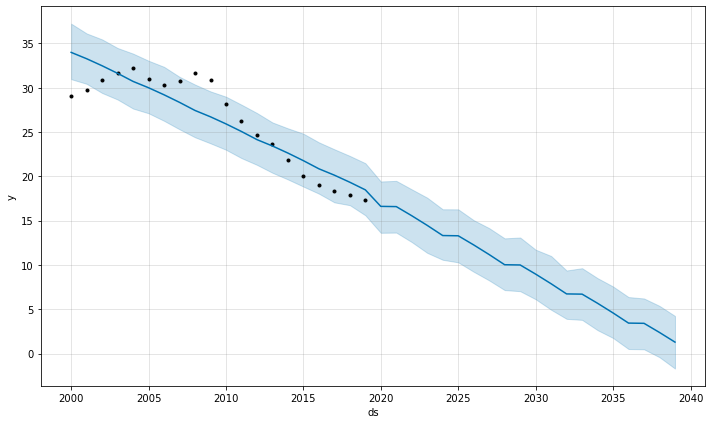

In [79]:
fig1 = m.plot(forecast)


In [27]:
# 2 Prediction model Males

In [37]:
# 1 Prediction with fbprophet - total (males + females)
df = pd.read_excel(r'C:\Users\dgruh\ironhack\assignments\week9\proyecto final\datasets\ES_early_leav_Males.xls')
df.head()

,ds,y
0,2000,35.0
1,2001,36.0
2,2002,37.2
3,2003,38.4
4,2004,39.0


In [38]:
df['ds'] = pd.to_datetime(df['ds'], format= '%Y')
df

,ds,y
0,2000-01-01,35.0
1,2001-01-01,36.0
2,2002-01-01,37.2
3,2003-01-01,38.4
4,2004-01-01,39.0
5,2005-01-01,37.0
6,2006-01-01,36.7
7,2007-01-01,36.6
8,2008-01-01,38.0
9,2009-01-01,37.4


In [39]:
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [58]:
m = Prophet()


In [59]:
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


In [60]:
future = m.make_future_dataframe(periods = 20, freq='Y')
future.head(30)

,ds
0,2000-01-01
1,2001-01-01
2,2002-01-01
3,2003-01-01
4,2004-01-01
5,2005-01-01
6,2006-01-01
7,2007-01-01
8,2008-01-01
9,2009-01-01


In [61]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,-2.855980,37.624297,44.274333,-2.855980,-2.855980,43.766744,43.766744,43.766744,43.766744,43.766744,43.766744,0.0,0.0,0.0,40.910763
1,2001-01-01,-3.860128,36.426636,43.435602,-3.860128,-3.860128,43.818577,43.818577,43.818577,43.818577,43.818577,43.818577,0.0,0.0,0.0,39.958448
2,2002-01-01,-4.861533,35.540472,42.580244,-4.861533,-4.861533,43.912400,43.912400,43.912400,43.912400,43.912400,43.912400,0.0,0.0,0.0,39.050868
3,2003-01-01,-5.862937,34.326369,41.884936,-5.862937,-5.862937,43.895119,43.895119,43.895119,43.895119,43.895119,43.895119,0.0,0.0,0.0,38.032182
4,2004-01-01,-6.864341,33.520966,40.418206,-6.864341,-6.864341,43.766744,43.766744,43.766744,43.766744,43.766744,43.766744,0.0,0.0,0.0,36.902403
5,2005-01-01,-7.868504,32.490768,39.686681,-7.868504,-7.868504,43.818577,43.818577,43.818577,43.818577,43.818577,43.818577,0.0,0.0,0.0,35.950072
6,2006-01-01,-8.869976,31.783755,38.508468,-8.869976,-8.869976,43.912400,43.912400,43.912400,43.912400,43.912400,43.912400,0.0,0.0,0.0,35.042425
7,2007-01-01,-9.871578,30.531555,37.472185,-9.871578,-9.871578,43.895119,43.895119,43.895119,43.895119,43.895119,43.895119,0.0,0.0,0.0,34.023542
8,2008-01-01,-10.874146,29.187178,36.158749,-10.874146,-10.874146,43.766744,43.766744,43.766744,43.766744,43.766744,43.766744,0.0,0.0,0.0,32.892598
9,2009-01-01,-11.880522,28.625111,35.383636,-11.880522,-11.880522,43.818577,43.818577,43.818577,43.818577,43.818577,43.818577,0.0,0.0,0.0,31.938054


In [62]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
35,2034-12-31,4.686804,1.374252,8.306597
36,2035-12-31,3.112442,-0.425006,6.496930
37,2036-12-31,3.483132,-0.008539,7.182664
38,2037-12-31,2.128035,-1.147134,5.986392
39,2038-12-31,0.662944,-2.824833,4.249992


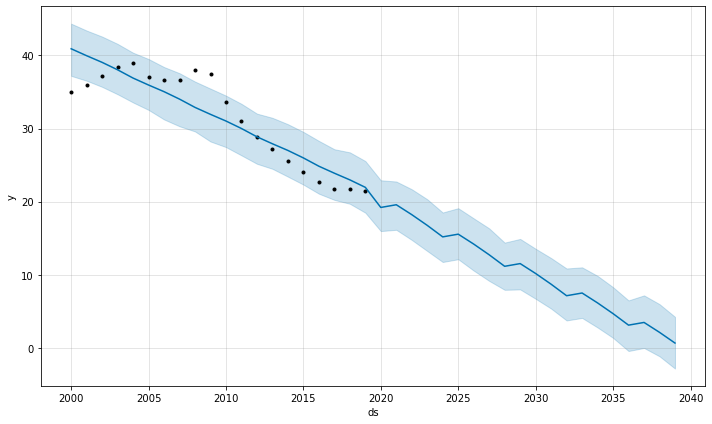

In [63]:
fig1 = m.plot(forecast)
